In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import the data
movies = pd.read_csv(r'C:\Users\chenl\OneDrive\デスクトップ\movies.csv')

# 3. Get to know the data
print(movies.info())
print(movies["year"].agg([max,min]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None
max    2020
min    1980
Name: year, dtype: int64


In [2]:
movies.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
# 4. Missing Values
print(movies.isna().any())
print(movies.isna().sum())
# Budget column has the most missing values, almost 25%. Need to pay attention when doing calculation with this column.

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [5]:
# 5. Data Cleaning

# Before everything, make a copy for later cleaning to keep the source data safe
movies_copy = movies.copy()

# 1) Change some column names to make it easier to understand
movies_copy.rename(columns = {"year":"release_year"}, inplace=True)

# 2) Released column contains both the released date and released country, split them into different columns
movies_copy[["release_date", "release_country"]] = movies_copy["released"].str.split("(", expand=True)
movies_copy["release_country"] = movies_copy["release_country"].str[:-1]
movies_copy.head()

,name,rating,genre,release_year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [8]:
# 3) Somehow some released years is not equal to the year in the released date column
movies_copy["release_year_correct"] = movies_copy["release_date"].str[-5:]
movies_copy.head(50)

,name,rating,genre,release_year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,"May 9, 1980",United States,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,"June 20, 1980",United States,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,"December 19, 1980",United States,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,"June 19, 1981",United States,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,"May 16, 1980",United States,1980


In [9]:
# 4) Thinking the nature of this project, is to finding correlation among factors 
# and also to see the pattern of popularity in some defined situations,the missing value is a lot (25%) 
# but luckily we will still have around 5500 entries which can still be sufficient to make sure the credibility of the results,
# so getting rid of them would be the best way
movies_dropna = movies_copy.dropna()
print(movies_dropna.isna().any())
print(movies_dropna.shape)

name                    False
rating                  False
genre                   False
release_year            False
released                False
score                   False
votes                   False
director                False
writer                  False
star                    False
country                 False
budget                  False
gross                   False
company                 False
runtime                 False
release_date            False
release_country         False
release_year_correct    False
dtype: bool
(5421, 18)


In [11]:
# 5) Drop Duplicates, if any, and finish the last bit data cleaning of changing necessary data types
movies_clean = movies_dropna.drop_duplicates(subset=["name", "rating", "release_year_correct", "director", "company", "score"])
movies_clean["release_year_correct"] = movies_clean["release_year_correct"].astype("int64")
print(movies_clean.shape)
print(movies_clean.info())

(5421, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  5421 non-null   object 
 1   rating                5421 non-null   object 
 2   genre                 5421 non-null   object 
 3   release_year          5421 non-null   int64  
 4   released              5421 non-null   object 
 5   score                 5421 non-null   float64
 6   votes                 5421 non-null   float64
 7   director              5421 non-null   object 
 8   writer                5421 non-null   object 
 9   star                  5421 non-null   object 
 10  country               5421 non-null   object 
 11  budget                5421 non-null   float64
 12  gross                 5421 non-null   float64
 13  company               5421 non-null   object 
 14  runtime               5421 non-null   float64
 15  release_da

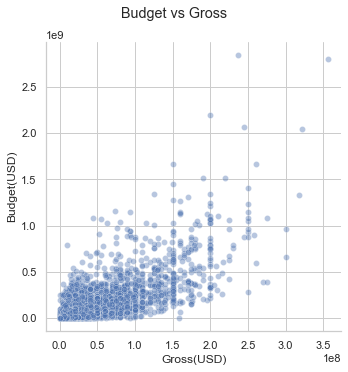

In [12]:
# 6. Define Hypothesis: What factors are strongly positively correlated to the gross revenue? 1)Budget, 2)score

# 7. Correlation Analysis
# 1) Budget vs gross
sns.set(rc={'figure.figsize':(12,8)})
sns.set_context("notebook")
sns.set_style("whitegrid")
bgt_vs_g = sns.relplot(x="budget", y="gross", data=movies_clean, alpha=0.4)
bgt_vs_g.fig.suptitle("Budget vs Gross", y=1.03)
bgt_vs_g.set(xlabel="Gross(USD)", ylabel="Budget(USD)")

[Text(0.5, 0, 'Gross(USD)'), Text(0, 0.5, 'Budget(USD)')]

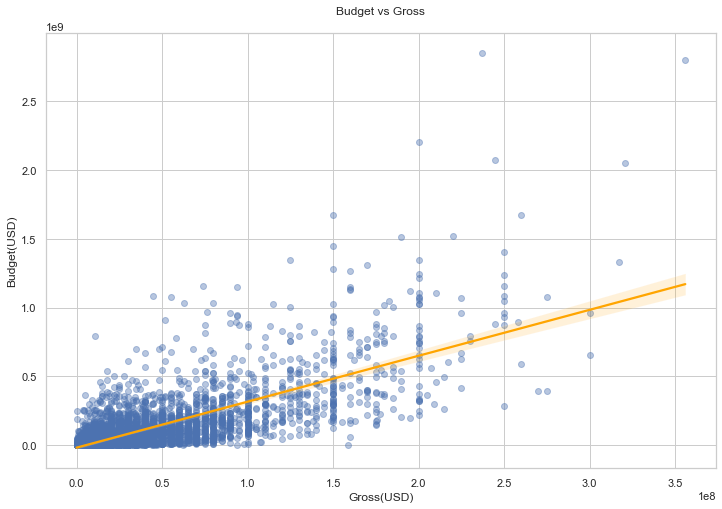

In [13]:
# Use a regression plot to make the relationship looks clearer
bgt_vs_g_reg = sns.regplot(x="budget", y="gross", data=movies_clean, scatter_kws={"alpha":0.4}, line_kws={"color":"orange"})
bgt_vs_g_reg.set_title("Budget vs Gross", y=1.03)
bgt_vs_g_reg.set(xlabel="Gross(USD)", ylabel="Budget(USD)")

[Text(0.5, 0, 'Gross(USD)'), Text(0, 0.5, 'IMDb Score')]

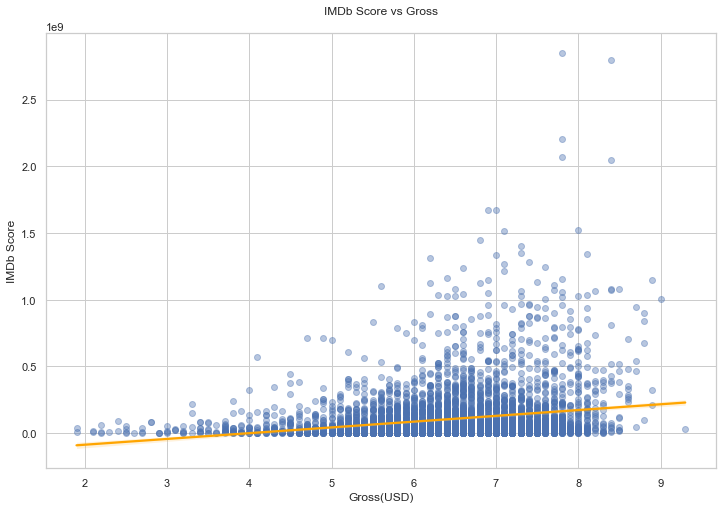

In [14]:
# We can see it is roughly a positive relationship above, then let's see score vs gross
#2) Score vs gross
s_vs_g_reg = sns.regplot(x="score", y="gross", data=movies_clean, scatter_kws={"alpha":0.4}, line_kws={"color":"orange"})
s_vs_g_reg.set_title("IMDb Score vs Gross", y=1.03)
s_vs_g_reg.set(xlabel="Gross(USD)", ylabel="IMDb Score")

In [15]:
# 3) Seems like both 2 pairs above have a positive relationship, roughly, next we want to konw how much are they correlated
movies_clean.corr()

,release_year,score,votes,budget,gross,runtime,release_year_correct
release_year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
release_year_correct,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [16]:
movies_clean.corr(method = "spearman")

,release_year,score,votes,budget,gross,runtime,release_year_correct
release_year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
release_year_correct,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


Text(84.453125, 0.5, 'Movie Features')

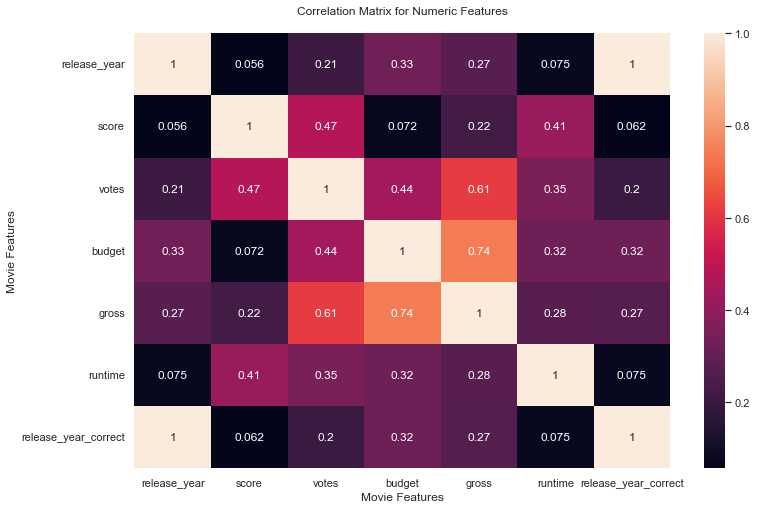

In [25]:
correlation_matrix = movies_clean.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features", y=1.03)
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

# - Seems like budget is indeed having a pretty obvious positive relationship vs gross, 
# while for score, the relationship is not that obvious. This is kind of frustrating thinking of movies of good quality 
# might not neccessarily getting good revenue.
# - Also amount of votes is having a very positive relationship vs gross, this also makes sense 
# because higher gross means more people bought tickets to watch the movie and then more possible for the movie to get more votes.

In [18]:
# 8. Company and Director that tend to make movies with better scores
company_score = movies_clean.groupby("company")["score"].agg([np.mean, np.median, np.std, max, min,])
company_score = company_score.sort_values("mean", ascending = False)
print(company_score.info())
print(company_score.head(20))
# Seems like most on the list are small companies that have very few but very good scores.

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, Tokuma Shoten to 19 Entertainment
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    1475 non-null   float64
 1   median  1475 non-null   float64
 2   std     446 non-null    float64
 3   max     1475 non-null   float64
 4   min     1475 non-null   float64
dtypes: float64(5)
memory usage: 69.1+ KB
None
                                 mean  median  std  max  min
company                                                     
Tokuma Shoten                     8.6     8.6  NaN  8.6  8.6
Cecchi Gori Pictures              8.6     8.6  NaN  8.6  8.6
Melampo Cinematografica           8.6     8.6  NaN  8.6  8.6
Strong Heart/Demme Production     8.6     8.6  NaN  8.6  8.6
Cristaldifilm                     8.5     8.5  NaN  8.5  8.5
Mooz Films                        8.4     8.4  NaN  8.4  8.4
Show East                         8.4     8.4  NaN  8.4  8.4
Wiedemann & Berg Fil

In [19]:
director_score = movies_clean.groupby("director")["score"].agg([np.mean, np.median, np.std, max, min,])
director_score = director_score.sort_values("mean", ascending = False)
print(director_score.info())
print(director_score.head(20))

<class 'pandas.core.frame.DataFrame'>
Index: 2063 entries, Roberto Benigni to Vondie Curtis-Hall
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    2063 non-null   float64
 1   median  2063 non-null   float64
 2   std     1004 non-null   float64
 3   max     2063 non-null   float64
 4   min     2063 non-null   float64
dtypes: float64(5)
memory usage: 96.7+ KB
None
                          mean  median       std  max  min
director                                                  
Roberto Benigni       8.600000    8.60       NaN  8.6  8.6
Tony Kaye             8.500000    8.50       NaN  8.5  8.5
Nadine Labaki         8.400000    8.40       NaN  8.4  8.4
Bob Persichetti       8.400000    8.40       NaN  8.4  8.4
Sergio Leone          8.400000    8.40       NaN  8.4  8.4
Stanley Kubrick       8.350000    8.35  0.070711  8.4  8.3
Lee Unkrich           8.300000    8.30  0.141421  8.4  8.2
Majid Majidi          8.300000    

In [22]:
# 9. Better movie genres for the past 4 decades, find out which decade average score for each genre
decade = []
for value in movies_clean["release_year_correct"]:
    if value < 1990:
        decade.append("1980-1990")
    elif value < 2000:
        decade.append("1990-2000")
    elif value < 2010:
        decade.append("2000-2010")
    else: 
        decade.append("2010-2020")

movies_clean["decade"] = decade
print(movies_clean.head(30))
print(movies_clean.tail(30))

                                              name rating      genre  \
0                                      The Shining      R      Drama   
1                                  The Blue Lagoon      R  Adventure   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                        Airplane!     PG     Comedy   
4                                       Caddyshack      R     Comedy   
5                                  Friday the 13th      R     Horror   
6                               The Blues Brothers      R     Action   
7                                      Raging Bull      R  Biography   
8                                      Superman II     PG     Action   
9                                  The Long Riders      R  Biography   
10                           Any Which Way You Can     PG     Action   
11                          The Gods Must Be Crazy     PG  Adventure   
12                                          Popeye     PG  Adven

Text(0, 0.5, 'Number of Movies')

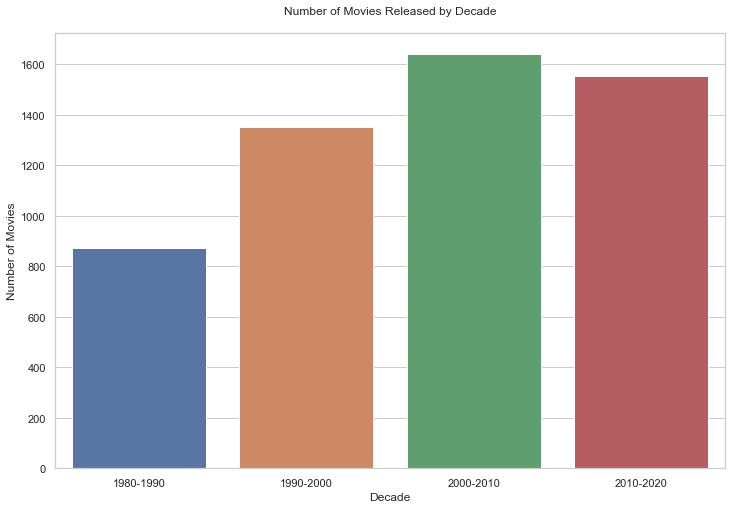

In [26]:
# Which decade is more flourishing with a lot number of movies releasing?
sns.countplot(x="decade", data=movies_clean)
plt.title("Number of Movies Released by Decade", y=1.03)
plt.xlabel("Decade")
plt.ylabel("Number of Movies")

Text(0.5, 0, 'Decade')

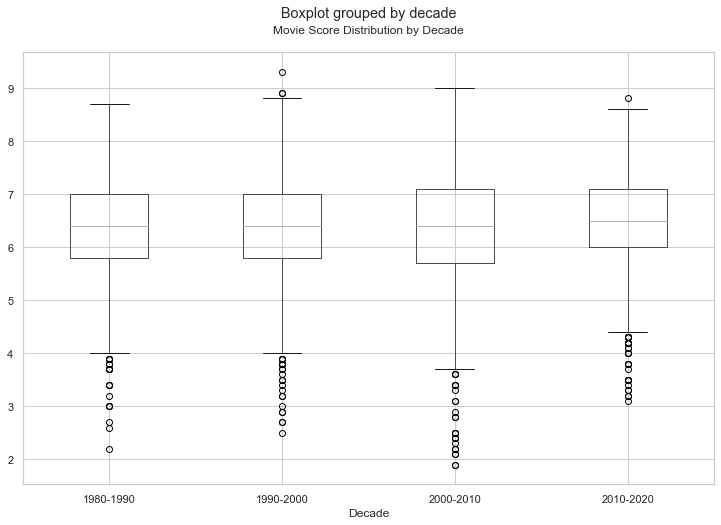

In [40]:
# Score Stats of the movies from the 4 decades
movies_clean.boxplot(column="score", by = "decade")
plt.title("Movie Score Distribution by Decade", y=1.03)
plt.xlabel("Decade")
# Seems like the score disctribution among the 4 decades are pretty similar, no significant differences found.

genre
Action       1415
Adventure     327
Animation     277
Biography     311
Comedy       1496
Crime         399
Drama         863
Horror        251
Name: name, dtype: int64

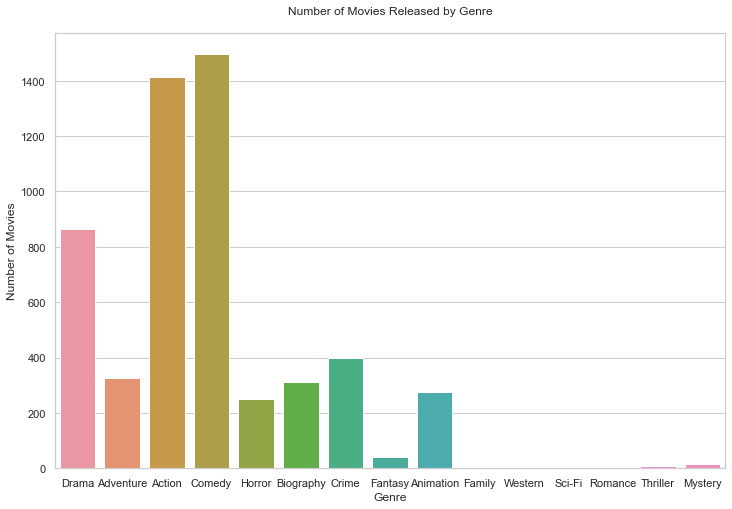

In [41]:
# Let's take another look at the score distribution among genres
sns.countplot(x="genre", data=movies_clean)
plt.title("Number of Movies Released by Genre", y=1.03)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
#For the 6 genres on the right, since they do not have sufficient data entries so we can focus on the other genres for the later analysis
genre_subset = movies_clean[~movies_clean["genre"].isin(["Family", "Western", "Sci-Fi", "Thriller", "Mystery", "Fantasy", "Romance"])]
genre_subset.groupby("genre")["name"].count()

Text(0.5, 0, 'Genre')

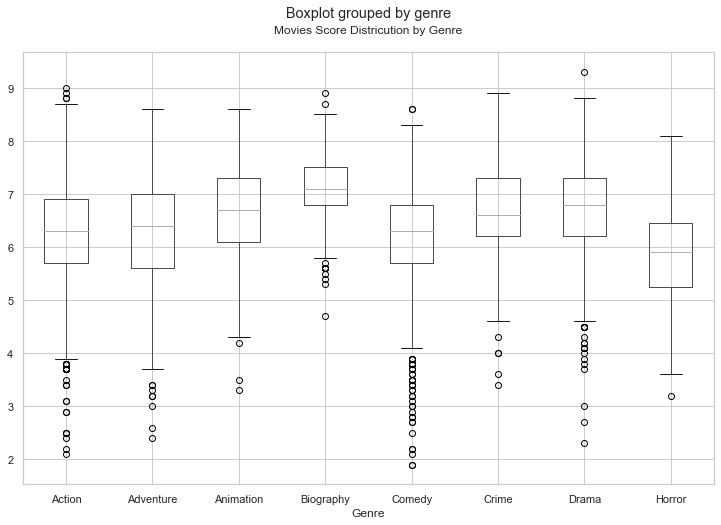

In [42]:
#Plot the genre score disctribution after subsetting.
genre_subset.boxplot(column="score", by = "genre")
plt.title("Movies Score Districution by Genre", y=1.03)
plt.xlabel("Genre")
#We can see that Biography genre behaves comparatively better than others, 
# significantly higher median and also the smallest spread which means the quality are generally high, which makes sense because most of this genres should be more of professional movies.
#Horror genre has the lowest median.
# Action and Adventure have relatively larger spread, having some really good movies but also some bad ones.

In [ ]:
# 10. Conclusion
# During this project, we started by reading and cleaning the data, then we did 2 analysis. 
# 1. The correlation analysis on the factors that are ralted to gross revenue. 
# Not exactly as we expected in the hypothesis, although budget is indeed having a strong positive correlation to gross, score is not that strong.
# 2. Finding out what kind of movies have been reted higer, and also those directors whose movies have been liked a lot during the past 4 decades.
# And we also got some interesting findings during this analysis.


In [ ]:
# [END]